In [1]:
import os
os.chdir('../SentiScores')
print(os.getcwd())

C:\Users\jacob\Desktop\cse408\P3\SentiScores


In [2]:
sentimentFilename = os.listdir(os.getcwd())[0]

In [3]:
sentimentDict = {}
with open(sentimentFilename,'r') as f:
    wordsAndScores = f.read().split('\n')
    for pair in wordsAndScores:
        newPair = pair.split("\t")
        sentimentDict[newPair[0]] = int(newPair[1])

In [4]:
sentimentDict

{'limited': -1,
 'suicidal': -2,
 'pardon': 2,
 'desirable': 2,
 'protest': -2,
 'lurking': -1,
 'controversial': -2,
 'hating': -3,
 'ridiculous': -3,
 'hate': -3,
 'aggression': -2,
 'increase': 1,
 'regretted': -2,
 'violate': -2,
 'granting': 1,
 'attracted': 1,
 'poorest': -2,
 'scold': -2,
 'bailout': -2,
 'sorry': -1,
 'regrets': -2,
 'struck': -1,
 'misreporting': -2,
 'vociferous': -1,
 'lurk': -1,
 'misunderstanding': -2,
 'distort': -2,
 'stolen': -2,
 'gratification': 2,
 'uncertain': -1,
 'stabbed': -2,
 'screaming': -2,
 'courageous': 2,
 'disturb': -2,
 'exaggerate': -2,
 'harried': -2,
 'solution': 1,
 'nigger': -5,
 'pardons': 2,
 'quaking': -2,
 'monopolized': -2,
 'censors': -2,
 'triumph': 4,
 'enjoy': 2,
 'shithead': -4,
 'tired': -2,
 'warns': -2,
 'landmark': 2,
 'elegant': 2,
 'fabulous': 4,
 'rigorous': 3,
 'emptiness': -1,
 'loathing': -3,
 'errors': -2,
 'hide': -1,
 'wreck': -2,
 'desirous': 2,
 'integrity': 2,
 'beaten': -2,
 'jocular': 2,
 'poison': -2,
 '

In [13]:
import pandas as pd
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer

#Change to data folder
os.chdir('../Data')
#Get list of all tweets
filenames = os.listdir(os.getcwd())
#Arrays to track each type of metric
names = []
uniquePercent = []
avgPosScore = []
avgNegScore = []
wordCounts = []
mcScore = [54,81,74,53,62,92,72,77,65,71,78,86,88,56,84]
en_stop = get_stop_words('en')
tokenizer = RegexpTokenizer(r'\w+')
#For each filename in the file
for filename in filenames:
    currentWordDoc = {}
    tweet_remove = ['rt','co']
    totalPos = 0.0
    totalNeg = 0.0
    unique = []
    #Get the name of the project
    name = filename.split(".")[0]
    for item in name.lower().split("_"):
        tweet_remove.append(item)
    #Change to a dataframe
    listOfTweets = pd.read_csv(filename,header=None)
    #Get total number of tweets in dataset
    totalNum = len(listOfTweets)
    #For each row in the dataframe
    for index, row in listOfTweets.iterrows():
        #Get the tweet
        tweet = row[0]
        #Set to lower and split the tweet into parts
        tweet_parts = tweet.lower().split(' ')
        tweet_parts = [i for i in tweet_parts if not '@' in i]
        tweet_parts = [i for i in tweet_parts if not 'http' in i]
        tweet_parts = tokenizer.tokenize(' '.join(tweet_parts))
        tweet_parts = [i for i in tweet_parts if not i in en_stop]
        tweet_parts = [i for i in tweet_parts if not i in tweet_remove]
        if tweet_parts not in unique:
            unique.append(tweet_parts)
        for part in tweet_parts:
            if part in sentimentDict:
                if part in currentWordDoc:
                    currentWordDoc[part] += 1
                else:
                    currentWordDoc[part] = 1
                currentScore = sentimentDict[part]
                if currentScore < 0:
                    totalNeg -= currentScore
                else:
                    totalPos += currentScore
    names.append(name.replace("_"," "))
    avgPosScore.append(totalPos / float(totalNum))
    avgNegScore.append(totalNeg / float(totalNum))
    uniquePercent.append(float(len(unique))/float(totalNum))
    wordCounts.append(currentWordDoc)
dataDF = {'names':names, 'avgPos': avgPosScore, 'avgNeg': avgNegScore, 'unique':uniquePercent, 'mcScore':mcScore}
dataDF = pd.DataFrame(dataDF)
print(dataDF)

    avgNeg  avgPos  mcScore              names  unique
0    0.257   1.043       54   Almost Christmas   0.549
1    0.371   3.219       81      Arrival Movie   0.314
2    0.070   0.916       74    Batman Telltale   0.274
3    0.235   0.344       53         Billy Lynn   0.256
4    0.256   0.993       62     Bleed for this   0.514
5    0.920   0.693       92       Dishonored 2   0.491
6    0.326   1.244       72     Doctor Strange   0.647
7    0.364   1.199       77  Edge of Seventeen   0.540
8    0.318   1.066       65   Fantastic Beasts   0.648
9    0.688   1.180       71      Hacksaw Ridge   0.495
10   0.673   1.733       78   Infinite Warfare   0.532
11   0.289   1.553       86     Planet Coaster   0.414
12   0.420   2.055       88        Pokemon Sun   0.435
13   0.424   3.434       56       Trolls Movie   0.348
14   0.186   0.932       84       Watch Dogs 2   0.424


In [6]:
from sklearn.linear_model import LinearRegression
feature_cols = ['avgNeg','avgPos','unique']
x = dataDF[feature_cols]
y = dataDF['mcScore']
lm = LinearRegression()
lm.fit(x,y)

print lm.intercept_
print lm.coef_

68.0185815004
[ 22.5221246    0.05480821  -8.57775839]


In [7]:
54.30120+11.944*1+26.576

92.8212

In [8]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='mcScore ~ avgNeg + avgPos + unique', data=dataDF).fit()
lm.summary()

C:\Users\jacob\Anaconda2\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mcScore   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                    0.6166
Date:                Tue, 22 Nov 2016   Prob (F-statistic):              0.618
Time:                        11:10:06   Log-Likelihood:                -57.603
No. Observations:                  15   AIC:                             123.2
Df Residuals:                      11   BIC:                             126.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     68.0186     16.540      4.112      0.002        31.615   104.423
avgNeg        22.5221     16.864      1.336      0.209       -14.595    59.639
avgPos         0.0548      4.231      0.013      0.990        -9.258     9.368
unique        -8.5778     31.125     -0.276      0.788       -77.084    59.929
==============================================================================
Omnibus:                        1.755   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.021
Skew:                          -0.285   Prob(JB):                        0.600
Kurtosis:                       1.856   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


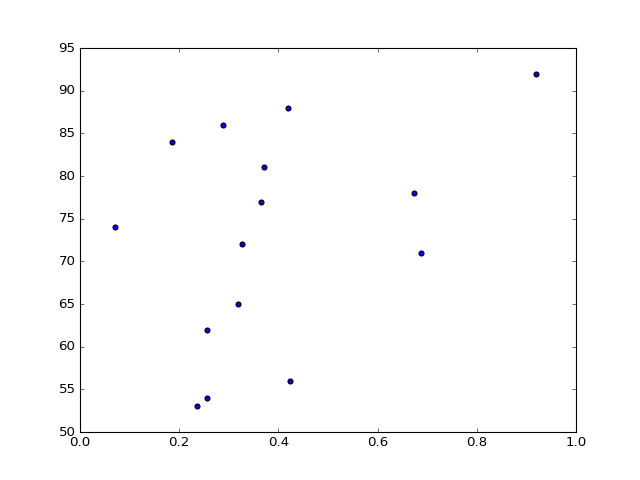

In [16]:
documentMatrix = []
uniqueKeys = []
for count in wordCounts:
    for key in count:
        if key not in uniqueKeys:
            uniqueKeys.append(key)
len(uniqueKeys)

668

In [17]:
i = 0
for count in wordCounts:
    currentVect = [mcScore[i]]
    i += 1
    for key in uniqueKeys:
        if key in count:
            currentVect.append(count[key])
        else:
            currentVect.append(0)
    documentMatrix.append(currentVect)

In [20]:
documentMatrix[1][0]

81

In [21]:
labels = ["mcScore"] + uniqueKeys

In [70]:
docMatrixDF = pd.DataFrame(documentMatrix)
docMatrixDF.columns = labels

In [71]:
docMatrixDF

,mcScore,exclusive,forget,cried,cute,heartfelt,bright,thanks,hell,yes,...,rewards,doomed,adore,embarrassing,struggling,abandoned,favorites,expand,stronger,dodging
0,54,1,3,1,4,1,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0
1,81,0,0,0,0,0,0,2,1,7,...,0,0,0,0,0,0,0,0,0,0
2,74,0,0,0,0,0,0,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,4,0,0,1,0,0,25,2,0,...,0,0,0,0,0,0,0,0,0,0
5,92,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
6,72,20,1,0,0,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0
7,77,5,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,65,2,2,2,0,0,0,5,1,3,...,0,0,0,0,0,0,0,0,0,0
9,71,1,20,0,0,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
docMatrixDF.corr().sort_values(['mcScore'])

,mcScore,exclusive,forget,cried,cute,heartfelt,bright,thanks,hell,yes,...,rewards,doomed,adore,embarrassing,struggling,abandoned,favorites,expand,stronger,dodging
big,-0.592011,-0.065402,0.165391,4.028848e-02,0.297352,-0.210805,-5.399240e-02,0.061478,0.251998,-0.333890,...,-0.116695,-0.116695,-0.116695,-0.116695,-0.116695,-0.116695,-0.116695,-0.116695,-0.116695,-0.116695
pleasure,-0.591934,0.072644,-0.165252,3.739788e-01,0.654883,-0.104828,2.941742e-01,0.089198,-0.283946,-0.075987,...,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828
pretend,-0.575820,0.111561,-0.045311,6.544629e-01,0.786739,0.681385,7.844645e-01,0.134172,0.020282,0.234868,...,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828
approved,-0.575820,0.111561,-0.045311,6.544629e-01,0.786739,0.681385,7.844645e-01,0.134172,0.020282,0.234868,...,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828
hard,-0.567393,0.037791,-0.227191,3.530733e-01,0.387682,0.197937,1.939700e-01,-0.236157,-0.284486,0.096894,...,-0.226214,-0.226214,-0.226214,-0.226214,-0.226214,-0.226214,-0.226214,-0.226214,-0.226214,-0.226214
care,-0.545372,0.602970,-0.165567,4.005344e-01,0.428363,0.112272,2.100420e-01,0.185444,0.032583,0.044390,...,-0.168408,-0.168408,-0.168408,-0.168408,-0.168408,-0.168408,-0.168408,-0.168408,-0.168408,-0.168408
cried,-0.535348,0.107214,-0.064791,1.000000e+00,0.667756,0.254824,4.767313e-01,0.100215,-0.049302,0.285466,...,-0.127412,-0.127412,-0.127412,-0.127412,-0.127412,-0.127412,-0.127412,-0.127412,-0.127412,-0.127412
comfort,-0.488610,-0.176536,-0.106362,-9.566568e-02,-0.082075,0.053631,-6.689001e-02,-0.191358,-0.166022,-0.243856,...,-0.080447,-0.080447,-0.080447,-0.080447,-0.080447,-0.080447,-0.080447,-0.080447,-0.080447,-0.080447
demand,-0.479134,-0.044105,-0.045311,9.349470e-02,0.028569,0.681385,2.941742e-01,0.066711,0.324510,-0.075987,...,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828,-0.104828
gift,-0.475330,0.210306,-0.097858,6.927345e-01,0.980124,0.249243,6.831702e-01,0.248593,-0.115510,0.220774,...,-0.011593,-0.011593,-0.011593,-0.011593,-0.011593,-0.011593,-0.011593,-0.011593,-0.011593,-0.011593


<IPython.core.display.Javascript object>


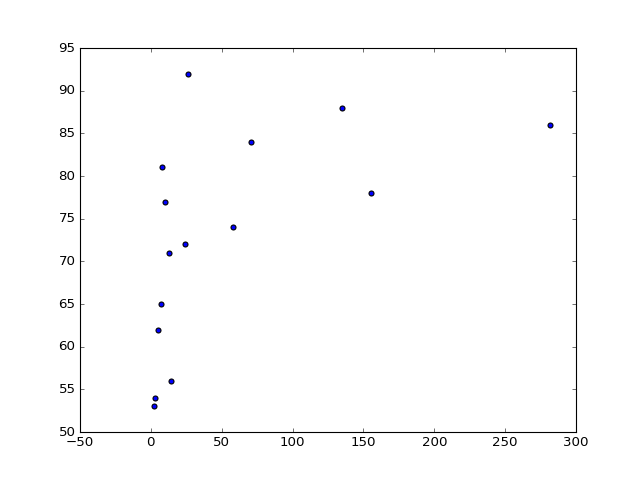

In [80]:
plt.scatter(docMatrixDF["liked"],docMatrixDF["mcScore"])

In [83]:
total = docMatrixDF.join(dataDF.set_index('mcScore'), on='mcScore')

In [87]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='mcScore ~ avgNeg + avgPos + awesome+ liked', data=total).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mcScore   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     3.080
Date:                Tue, 22 Nov 2016   Prob (F-statistic):             0.0679
Time:                        11:46:30   Log-Likelihood:                -52.747
No. Observations:                  15   AIC:                             115.5
Df Residuals:                      10   BIC:                             119.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     58.8736      6.904      8.528      0.000        43.491    74.256
avgNeg        12.2218     13.218      0.925      0.377       -17.229    41.673
avgPos        -4.1732      3.805     -1.097      0.298       -12.651     4.305
awesome        4.7090      2.758      1.708      0.119        -1.435    10.853
liked          0.0444      0.041      1.076      0.307        -0.048     0.137
==============================================================================
Omnibus:                        1.698   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                0.881
Skew:                          -0.001   Prob(JB):                        0.644
Kurtosis:                       1.813   Cond. No.                         504.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
docMatrixDF

,mcScore,exclusive,forget,cried,cute,heartfelt,bright,thanks,hell,yes,...,rewards,doomed,adore,embarrassing,struggling,abandoned,favorites,expand,stronger,dodging
0,54,1,3,1,4,1,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0
1,81,0,0,0,0,0,0,2,1,7,...,0,0,0,0,0,0,0,0,0,0
2,74,0,0,0,0,0,0,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,4,0,0,1,0,0,25,2,0,...,0,0,0,0,0,0,0,0,0,0
5,92,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
6,72,20,1,0,0,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0
7,77,5,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,65,2,2,2,0,0,0,5,1,3,...,0,0,0,0,0,0,0,0,0,0
9,71,1,20,0,0,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0
